Import all the necessary libraries & functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from load_data import load_data
import seaborn as sns


print('All the libraries are imported correctly.')

All the libraries are imported correctly.


Preprocess all the data from the first dataset and then split it into training and test datasets.

In [2]:
X, Y = load_data('data/dataset1.csv')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()

# Data standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

data/dataset1.csv


Initialize and fit the data to the SVM model with linear kernel

In [3]:
svm_linear_kernel_model = SVC(kernel='linear', C=1)  
svm_linear_kernel_model.fit(X_train, y_train)

# Make predictions on the test set
y_linear_pred = svm_linear_kernel_model.predict(X_test)

Initialize and fit the data to the SVM model with polynomial kernel

In [4]:
svm_poly_kernel_model = SVC(kernel='poly', C=1, degree=3)  
svm_poly_kernel_model.fit(X_train, y_train)


y_poly_pred = svm_poly_kernel_model.predict(X_test)

Verify the accuracy of both models by using cross validation

In [5]:
linear_kernel_model_scores = cross_val_score(svm_linear_kernel_model, X, Y, cv=5, scoring='accuracy')
svm_poly_kernel_model_scores = cross_val_score(svm_poly_kernel_model, X, Y, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Linear kernel Cross-Validation Scores:", linear_kernel_model_scores)
print("Poly kernel Cross-Validation Scores:", svm_poly_kernel_model_scores)

print('\n')

# Calculate and print the mean and standard deviation of the scores
print("Linear kernel Standard Deviation:", linear_kernel_model_scores.std(), ' vs. Poly kernel Standard Deviation: ', svm_poly_kernel_model_scores.std())
print("Linear kernel Mean Accuracy: ", linear_kernel_model_scores.mean(), ' vs. Poly kernel Mean Accuracy: ', svm_poly_kernel_model_scores.mean())


Linear kernel Cross-Validation Scores: [0.9876 0.9878 0.9859 0.9872 0.9882]
Poly kernel Cross-Validation Scores: [0.9891 0.9885 0.9883 0.9876 0.9902]


Linear kernel Standard Deviation: 0.000788923316932639  vs. Poly kernel Standard Deviation:  0.0008731551981177041
Linear kernel Mean Accuracy:  0.98734  vs. Poly kernel Mean Accuracy:  0.98874


Report the accuracy of the model 

In [6]:
linear_k_accuracy = accuracy_score(y_test, y_linear_pred)
linear_k_recall_score = recall_score(y_test, y_linear_pred, average='micro')
linear_k_precision = precision_score(y_test, y_linear_pred, average='micro')
linear_k_report = classification_report(y_test, y_linear_pred)

poly_k_accuracy = accuracy_score(y_test, y_poly_pred)
poly_k_recall_score = recall_score(y_test, y_poly_pred, average='micro')
poly_k_precision = precision_score(y_test, y_poly_pred, average='micro')
poly_k_report= classification_report(y_test, y_poly_pred)

print("Linear Kernel Accuracy:", linear_k_accuracy, ' vs. Poly Kernel Accuracy: ', poly_k_accuracy)
print("Linear Kernel Recall:", linear_k_recall_score, ' vs. Poly Kernel Recall: ', poly_k_recall_score)
print("Linear Kernel Precision:", linear_k_precision, ' vs. Poly Kernel Precision: ', poly_k_precision)


print("Linear Kernel Classification Report:\n", linear_k_report)
print("Poly Kernel Classification Report:\n", poly_k_report)


Linear Kernel Accuracy: 0.9853333333333333  vs. Poly Kernel Accuracy:  0.9855333333333334
Linear Kernel Recall: 0.9853333333333333  vs. Poly Kernel Recall:  0.9855333333333334
Linear Kernel Precision: 0.9853333333333333  vs. Poly Kernel Precision:  0.9855333333333334
Linear Kernel Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1473
           1       1.00      0.99      0.99      1477
           2       0.98      0.98      0.98      1500
           3       0.96      0.97      0.96      1542
           4       0.99      0.99      0.99      1437
           5       0.96      0.96      0.96      1545
           6       1.00      0.99      0.99      1465
           7       0.99      0.99      0.99      1491
           8       1.00      1.00      1.00      1546
           9       0.99      0.99      0.99      1524

    accuracy                           0.99     15000
   macro avg       0.99      0.99      0.99 

Checking the performance of the model by using a confusion matrix - SVM w. Poly Kernel

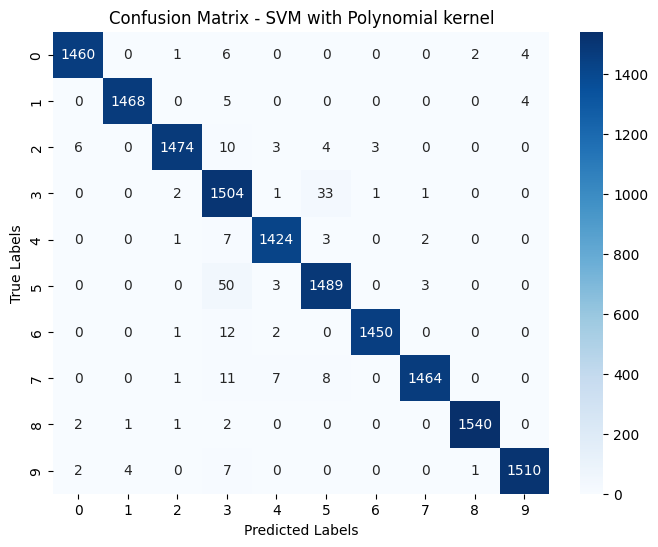

In [10]:
# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_poly_pred) 

# Display the confusion matrix using a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM with Polynomial kernel')
plt.show()


Test the 'blind test dataset' on the trained SVM model with linear kernel

In [11]:
blind_test_data, y = load_data('data/blind_test1.csv')

# Standardize the feature data for the blind test dataset
X_blind = scaler.transform(blind_test_data)

# Make predictions on the blind test data
blind_test_predictions = svm_poly_kernel_model.predict(X_blind)


df = pd.DataFrame(blind_test_data)

data/blind_test1.csv


Save the predictions for data in the 'blind tests' into a .csv file

In [13]:
# Save the blind predictions to a file 
#df['X'] = df.apply(lambda row: row.values, axis=1)
df['Predicted_label_class'] = blind_test_predictions

# Remove all the columns from the dataframe except the last one: the last one is the Y column with the predictions.
df = df.iloc[:, -1:]

# Export predictions for data into a .csv file
df.to_csv('d1_2133421.csv', index=False)
